Current working directory: d:\Science-Experiments\Jupyter Notebook
os.getcwd() returns an object of type <class 'str'>


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_26228\1789246876.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(date_time)
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_26228\1789246876.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('At_Gas.csv', parse_dates=['Dates'])
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_26228\1789246876.py:28: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(dates, prices, '-')


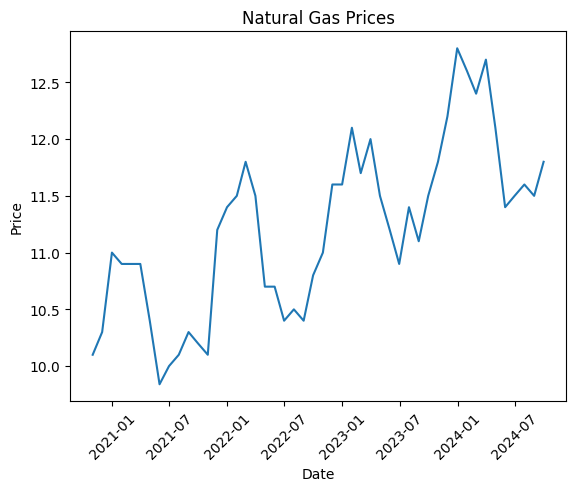

In [2]:
import os

cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))

print ("os.getcwd() returns an object of type {0}".format(type(cwd)))

# copy the filepath 
os.chdir ("D:\Power BI thing\Forage Data sets\JPMC Data analyst")

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from datetime import date,timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

df = pd.read_csv('At_Gas.csv', parse_dates=['Dates'])
prices = df['Prices'].values
dates = df['Dates'].values

# plot prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()
# From the plot - we can see the prices have a natural frequency of around a year, but trend upwards. 
# We can do a linear regression to get the trend, and then fit a sin function to the variation in each year.


In [3]:
#here we are parsing dates

start_date = date(2020,10,31)
end_date = date(2024,9,30)
months = []
year = start_date.year #Extract year from Start date
month = start_date.month + 1 #Extract month from start date

#This loop is used to get the ending date of a month
while True:
    current = date(year, month, 1) + timedelta(days=-1) #This subtracts 1 from the date so we end up with the last date of the previos month
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1

days_from_start = [(day - start_date ).days for day in months] 

print(months)
print(days_from_start)

[datetime.date(2020, 10, 31), datetime.date(2020, 11, 30), datetime.date(2020, 12, 31), datetime.date(2021, 1, 31), datetime.date(2021, 2, 28), datetime.date(2021, 3, 31), datetime.date(2021, 4, 30), datetime.date(2021, 5, 31), datetime.date(2021, 6, 30), datetime.date(2021, 7, 31), datetime.date(2021, 8, 31), datetime.date(2021, 9, 30), datetime.date(2021, 10, 31), datetime.date(2021, 11, 30), datetime.date(2021, 12, 31), datetime.date(2022, 1, 31), datetime.date(2022, 2, 28), datetime.date(2022, 3, 31), datetime.date(2022, 4, 30), datetime.date(2022, 5, 31), datetime.date(2022, 6, 30), datetime.date(2022, 7, 31), datetime.date(2022, 8, 31), datetime.date(2022, 9, 30), datetime.date(2022, 10, 31), datetime.date(2022, 11, 30), datetime.date(2022, 12, 31), datetime.date(2023, 1, 31), datetime.date(2023, 2, 28), datetime.date(2023, 3, 31), datetime.date(2023, 4, 30), datetime.date(2023, 5, 31), datetime.date(2023, 6, 30), datetime.date(2023, 7, 31), datetime.date(2023, 8, 31), datetime.d

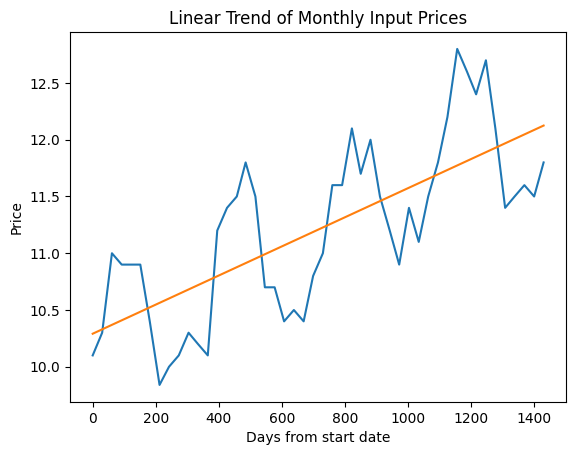

0.001282373598760221 10.29104112595228


In [4]:
# Simple regression for the trend will fit to a model y = Ax + B. The estimator for the slope is given by \hat{A} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}, 
# and that for the intercept by \hat{B} = \bar{y} - hat{A} * \xbar

def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar))/ np.sum((x - xbar)**2)
    intercept = ybar - slope*xbar
    return slope, intercept

time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot linear trend
plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()
print(slope, intercept)



In [5]:
# From this plot we see the linear trend has been captured. Now to fit the intra-year variation. 
# Given that natural gas is used more in winter, and less in summer, we can guess the frequency of the price movements to be about a year, or 12 months.
# Therefore we have a model y = Asin( kt + z ) with a known frequency. Rewriting y = Acos(z)sin(kt) + Asin(z)cos(kt), 
# we can use bilinear regression, with no intercept, to solve for u = Acos(z), w = Asin(z)


sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))

print("Sin",sin_prices,"\n Sin time",sin_time,"\n cos", cos_time)


Sin [-0.19104113 -0.02951233  0.63073408  0.4909805   0.45507404  0.41532046
 -0.12315075 -0.72290433 -0.60137554 -0.54112912 -0.3808827  -0.51935391
 -0.65910749  0.4024213   0.56266772  0.62291414  0.88700768  0.5472541
 -0.29121711 -0.33097069 -0.6694419  -0.60919548 -0.74894906 -0.38742027
 -0.22717385  0.33435494  0.29460136  0.75484778  0.31894132  0.57918773
  0.04071653 -0.29903706 -0.63750826 -0.17726185 -0.51701543 -0.15548664
  0.10475978  0.46628858  1.02653499  0.78678141  0.54959258  0.809839
  0.17136779 -0.56838579 -0.506857   -0.44661058 -0.58636416 -0.32483537] 
 Sin time [ 0.00000000e+00  4.93775550e-01  8.67456355e-01  9.99916659e-01
  8.80012204e-01  5.16062391e-01  2.58184402e-02 -4.86272707e-01
 -8.54322170e-01 -9.99916659e-01 -8.67456355e-01 -5.08670944e-01
  6.43249060e-16  4.93775550e-01  8.67456355e-01  9.99916659e-01
  8.80012204e-01  5.16062391e-01  2.58184402e-02 -4.86272707e-01
 -8.54322170e-01 -9.99916659e-01 -8.67456355e-01 -5.08670944e-01
  1.28649812e

Text(0.5, 1.0, 'Smoothed Estimate of Monthly Input Prices')

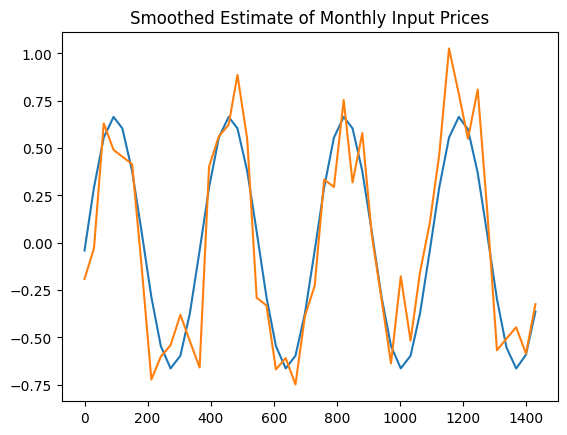

In [6]:
#yahaan se aage kya hua samjha toh nai, lekin figure out karna hai

def bilinear_regression(y, x1, x2):
    # Bilinear regression without an intercept amounts to projection onto the x-vectors
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)

# We now recover the original amplitude and phase shift as A = slope1 ** 2 + slope2 ** 2, z = tan^{-1}(slope2/slope1)
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)	

# Plot smoothed estimate of full dataset
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')


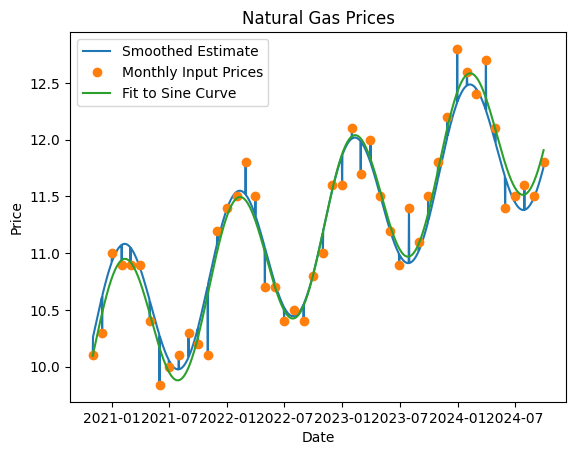

In [7]:
# Define the interpolation/extrapolation function
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Exact match found in the data
        return prices[days_from_start.index(days)]
    else:
        # Interpolate/extrapolate using the sin/cos model
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Create a range of continuous dates from start date to end date
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate of the full dataset using interpolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')

# Fit the monthly input prices to the sine curve
x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()
plt.show()


c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -2.111
Date:                            Sun, 27 Apr 2025   AIC                             14.222
Time:                                    12:03:42   BIC                             21.059
Sample:                                         0   HQIC                            16.363
                                             - 42                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2175      0.293     -0.741      0.459      -0.793       0.358
ma.L1         -0.8275      0.237   

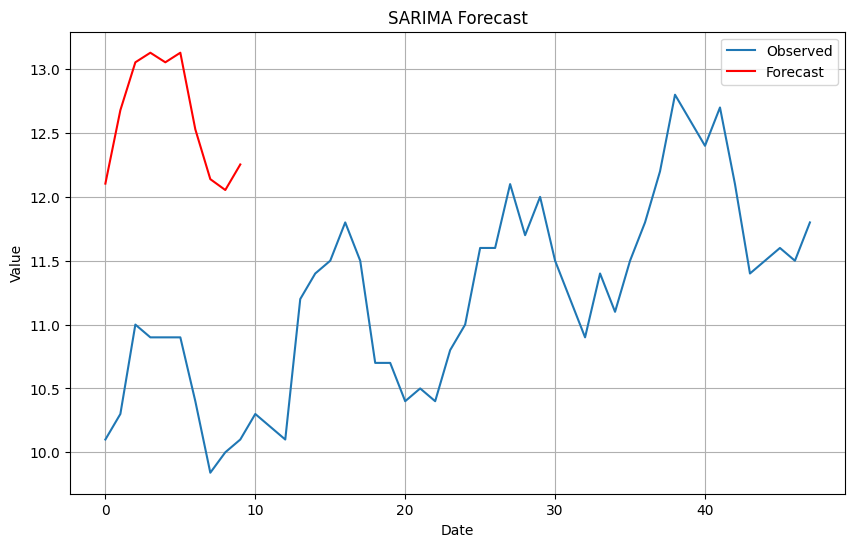

In [ ]:
# Fitting a SARIMA model using EXPONENTIAL SMOOTHING
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit seasonal exponential smoothing model

model_exp_smooth = ExponentialSmoothing(prices, seasonal_periods=12, trend='add', seasonal='add')

result_exp_smooth = model_exp_smooth.fit()

#print(result_exp_smooth.summary())
#Split data into test and training
#train data is from start till (end - 12) data points
train = prices[:len(prices)-12]
#test data is (Start-12) till the end data points
test = prices[len(prices)-12:]

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))

#Fit the model 
model_fit = model.fit() 
print(model_fit.summary())

# Forecast future values
forecast = result_exp_smooth.forecast(steps=10)
print(prices)
print(forecast)
#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()
